**Residual Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
x=df.drop('Price',axis=1)
y=df['Price']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"MAE: {mae:.2f}$100k")
print(f"RMSE:{rmse:.2f}$100k")
print(f"R2:{r2:.2f}")

MAE: 0.53$100k
RMSE:0.75$100k
R2:0.58


**cal residuals**

In [10]:
#residual=actual - predicted
residual=y_test - y_pred
print("first 5 residuals")
print(pd.DataFrame({'actual':y_test[:5],'predicted':y_pred[:5],'residual':residual[:5]}))

first 5 residuals
        actual  predicted  residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


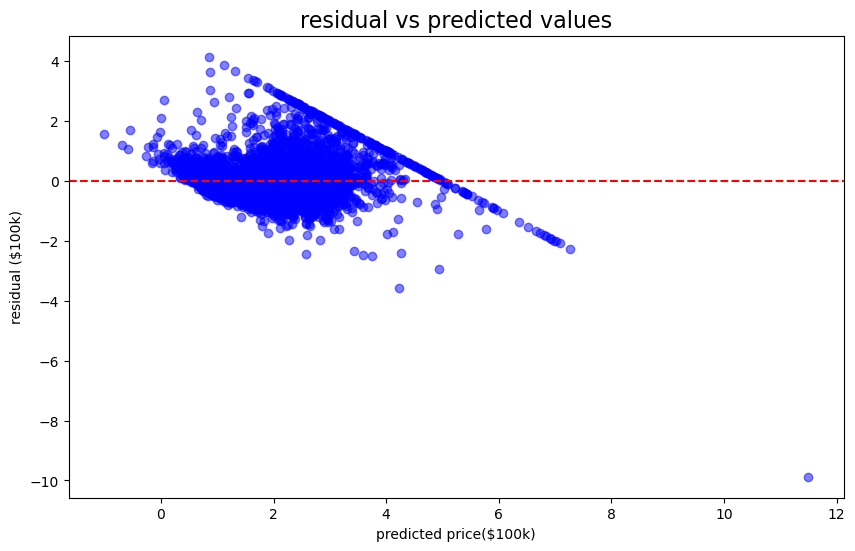

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residual,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('residual vs predicted values',fontsize=16)
plt.xlabel('predicted price($100k)')
plt.ylabel('residual ($100k)')
plt.show()

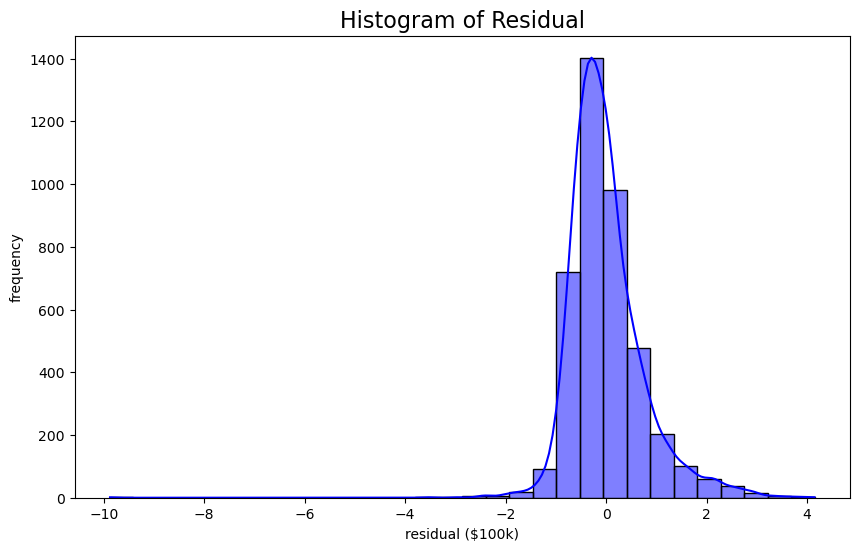

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(residual,bins=30,kde=True,color='blue')
plt.title('Histogram of Residual',fontsize=16)
plt.xlabel('residual ($100k)')
plt.ylabel('frequency')
plt.show()

**Q-Q Plot(Normality check)**

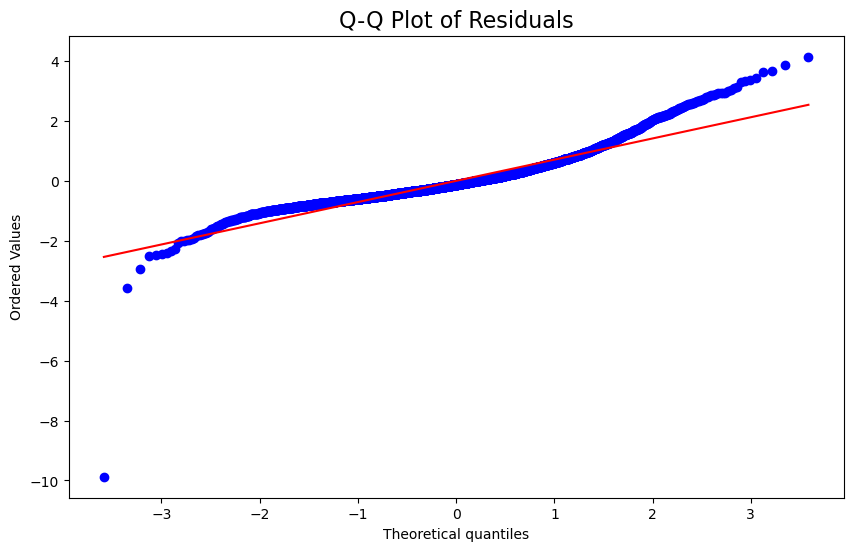

In [17]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residual,dist="norm",plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize=16)
plt.show()

K-Fold cross-validation (most common)

In [19]:
#Cross Validation 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
#Generate synthetic data
x,y=make_regression(n_samples=100,n_features=2,noise=20)

#K-fold cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

#perform cross validation
scores=cross_val_score(model,x,y,cv=kf,scoring='r2')
print("Cross-validation scores",scores)
print("Average score:",scores.mean())

Cross-validation scores [0.94797147 0.94560532 0.96834737 0.96708741 0.97278438]
Average score: 0.9603591892182779
